In [20]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('PlantSelected/NoControls/04_Evening.jpg')

# Convert to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define range for green color in HSV (adjusted for bright green leaves)
lower_green = np.array([35, 70, 70])
upper_green = np.array([158, 255, 255])

# Create a mask for green color
mask = cv2.inRange(hsv, lower_green, upper_green)

# Apply the mask to the original image
result = cv2.bitwise_and(image, image, mask=mask)

cv2.imwrite('hsv_segmentation.jpg', result)
cv2.imwrite('green_mask.jpg', mask)


True

In [21]:
import cv2
import numpy as np

# Read the binary mask from previous step
binary = cv2.imread('green_mask.jpg', 0)

# Create kernels for morphological operations
small_kernel = np.ones((3,3), np.uint8)
large_kernel = np.ones((7,7), np.uint8)

# Remove small noise with opening
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, small_kernel, iterations=2)

# Fill holes with closing
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, large_kernel, iterations=3)

cv2.imwrite('morphological_cleaned.jpg', closing)


True

In [22]:
import cv2
import numpy as np

# Read the cleaned binary image
binary = cv2.imread('morphological_cleaned.jpg', 0)

# Find contours
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by area to remove small noise
min_contour_area = 1200  # Adjust based on your image scale
filtered_contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]

# Draw contours on original image
image = cv2.imread('PlantSelected/NoControls/04_Evening.jpg')
cv2.drawContours(image, filtered_contours, -1, (0, 255, 0), 2)

# Count leaves (filtered contours)
leaf_count = len(filtered_contours)

# Add text to image
cv2.putText(image, f'Leaf count: {leaf_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

cv2.imwrite('accurate_leaf_count.jpg', image)


True

In [13]:
import cv2
import numpy as np

# Read the cleaned binary image
binary = cv2.imread('morphological_cleaned.jpg', 0)

# Find contours
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by area
min_contour_area = 500
filtered_contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]

# Create a blank image to draw the filtered contours
leaf_mask = np.zeros_like(binary)
cv2.drawContours(leaf_mask, filtered_contours, -1, 255, -1)

# Count white pixels (leaf area)
leaf_area_pixels = np.sum(leaf_mask == 255)

# Assuming 1 cm² = X pixels (you need to calibrate this)
# For example, if you know the pot diameter is 5 cm
pot_diameter_cm = 5
pot_diameter_pixels = binary.shape[1]  # Assuming pot width is image width
pixels_per_cm2 = (pot_diameter_pixels / pot_diameter_cm) ** 2

leaf_area_cm2 = leaf_area_pixels / pixels_per_cm2

# Create a color image to show the measured area
original = cv2.imread('04_Evening.jpg')
result = original.copy()
colored_mask = cv2.cvtColor(leaf_mask, cv2.COLOR_GRAY2BGR)
colored_mask[leaf_mask == 255] = [0, 255, 0]  # Green color for leaves

# Blend the original image with the colored mask
alpha = 0.5
result = cv2.addWeighted(result, 1, colored_mask, alpha, 0)

# Add text showing the leaf area
cv2.putText(result, f'Leaf area: {leaf_area_cm2:.2f} cm²', (10, 60), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

cv2.imwrite('leaf_area_measurement.jpg', result)


True

True

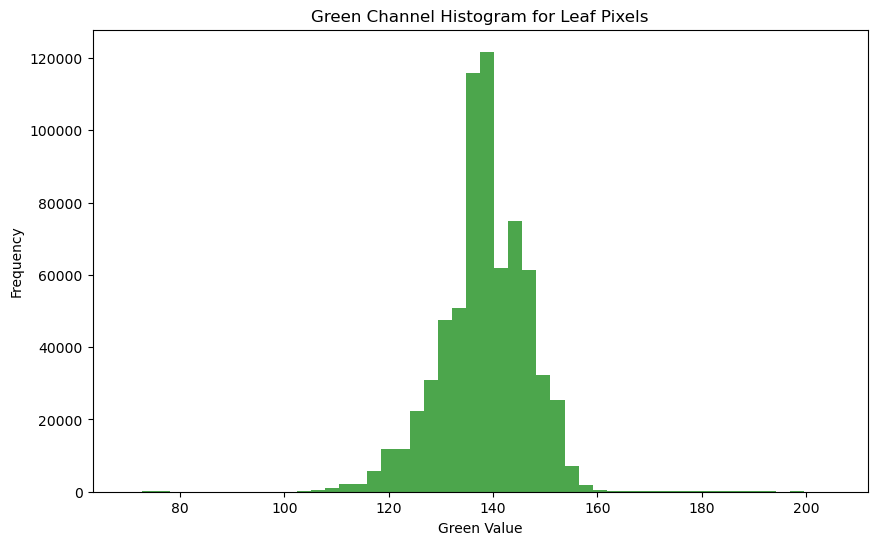

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the original image and the leaf mask
original = cv2.imread('04_Evening.jpg')
leaf_mask = cv2.imread('morphological_cleaned.jpg', 0)

# Convert BGR to RGB for better color analysis
rgb_image = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# Extract only the leaf pixels using the mask
leaf_pixels = rgb_image[leaf_mask == 255]

# Calculate average RGB values
avg_r = np.mean(leaf_pixels[:, 0])
avg_g = np.mean(leaf_pixels[:, 1])
avg_b = np.mean(leaf_pixels[:, 2])

# Create a histogram of green channel values
plt.figure(figsize=(10, 6))
plt.hist(leaf_pixels[:, 1], bins=50, color='green', alpha=0.7)
plt.title('Green Channel Histogram for Leaf Pixels')
plt.xlabel('Green Value')
plt.ylabel('Frequency')
plt.savefig('leaf_green_histogram.jpg')

# Create a color analysis image
result = original.copy()
cv2.putText(result, f'Avg RGB: ({avg_r:.1f}, {avg_g:.1f}, {avg_b:.1f})', 
            (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

cv2.imwrite('leaf_color_analysis.jpg', result)


Could not read image: PlantSelected/NoControls/PlantSelected/NoControls\01_Morning.jpg
Processed PlantSelected/NoControls\01_Morning.jpg: 0 leaves detected
Could not read image: PlantSelected/NoControls/PlantSelected/NoControls\02_Morning.jpg
Processed PlantSelected/NoControls\02_Morning.jpg: 0 leaves detected
Could not read image: PlantSelected/NoControls/PlantSelected/NoControls\03_Morning.jpg
Processed PlantSelected/NoControls\03_Morning.jpg: 0 leaves detected
Could not read image: PlantSelected/NoControls/PlantSelected/NoControls\04_Evening.jpg
Processed PlantSelected/NoControls\04_Evening.jpg: 0 leaves detected
Could not read image: PlantSelected/NoControls/PlantSelected/NoControls\04_Morning.jpg
Processed PlantSelected/NoControls\04_Morning.jpg: 0 leaves detected
Could not read image: PlantSelected/NoControls/PlantSelected/NoControls\05_Evening.jpg
Processed PlantSelected/NoControls\05_Evening.jpg: 0 leaves detected
Could not read image: PlantSelected/NoControls/PlantSelected/NoC

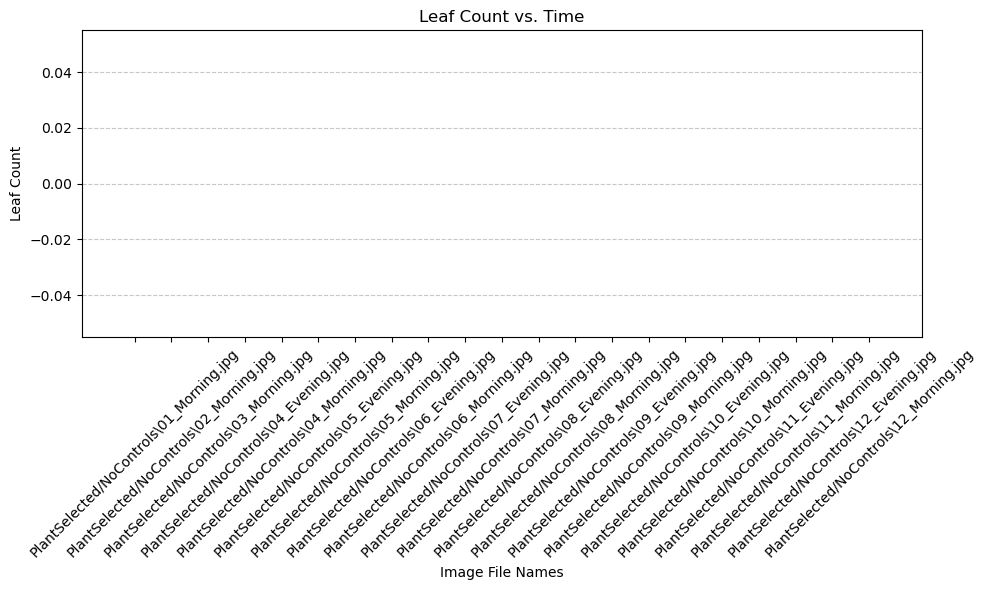

Processing complete. Results saved.


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Folder containing images
image_folder = 'PlantSelected/NoControls/'  # Current folder, change if needed
# Get all image files with the pattern (or specify them directly)
#image_files = ["01_Morning.jpg", "01_Evening.jpg", "02_Morning.jpg"]
image_files = sorted(glob.glob(os.path.join(image_folder, "*.jpg")))

def count_leaves(image_path):
    """
    Count leaves in an image using HSV segmentation and contour analysis.
    """
    # Read the image
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Could not read image: {image_path}")
        return 0
    
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define range for green color in HSV
    lower_green = np.array([35, 70, 70])
    upper_green = np.array([90, 255, 255])
    
    # Create a mask for green color
    mask = cv2.inRange(hsv, lower_green, upper_green)
    
    # Morphological operations for noise removal
    small_kernel = np.ones((3, 3), np.uint8)
    large_kernel = np.ones((7, 7), np.uint8)
    
    # Remove small noise with opening
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, small_kernel, iterations=2)
    
    # Fill holes with closing
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, large_kernel, iterations=3)
    
    # Save intermediate result for debugging
    debug_filename = "debug_" + os.path.basename(image_path)
    cv2.imwrite(debug_filename, closing)
    
    # Find contours
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours by area to remove small noise
    min_contour_area = 500  # Adjust based on your image scale
    filtered_contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]
    
    # Draw contours on a copy of the original image for visualization
    result_img = image.copy()
    cv2.drawContours(result_img, filtered_contours, -1, (0, 255, 0), 2)
    
    # Add text showing the leaf count
    cv2.putText(result_img, f'Leaf count: {len(filtered_contours)}', 
                (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
    # Save the result image
    result_filename = "result_" + os.path.basename(image_path)
    cv2.imwrite(result_filename, result_img)
    
    return len(filtered_contours)

# Process each image and count leaves
leaf_counts = {}
for image_file in image_files:
    full_path = os.path.join(image_folder, image_file)
    leaf_counts[image_file] = count_leaves(full_path)
    print(f"Processed {image_file}: {leaf_counts[image_file]} leaves detected")

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(leaf_counts.keys(), leaf_counts.values(), color='green')
plt.xlabel('Image File Names')
plt.ylabel('Leaf Count')
plt.title('Leaf Count vs. Time')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the graph
plt.savefig('leaf_count_graph.png')
plt.show()

print("Processing complete. Results saved.")


01_Morning.jpg: 2 leaves detected
02_Morning.jpg: 2 leaves detected
03_Morning.jpg: 2 leaves detected
04_Morning.jpg: 2 leaves detected
05_Morning.jpg: 2 leaves detected
06_Morning.jpg: 5 leaves detected
07_Morning.jpg: 2 leaves detected
08_Morning.jpg: 2 leaves detected
09_Morning.jpg: 3 leaves detected
10_Morning.jpg: 2 leaves detected
11_Morning.jpg: 1 leaves detected
12_Morning.jpg: 1 leaves detected


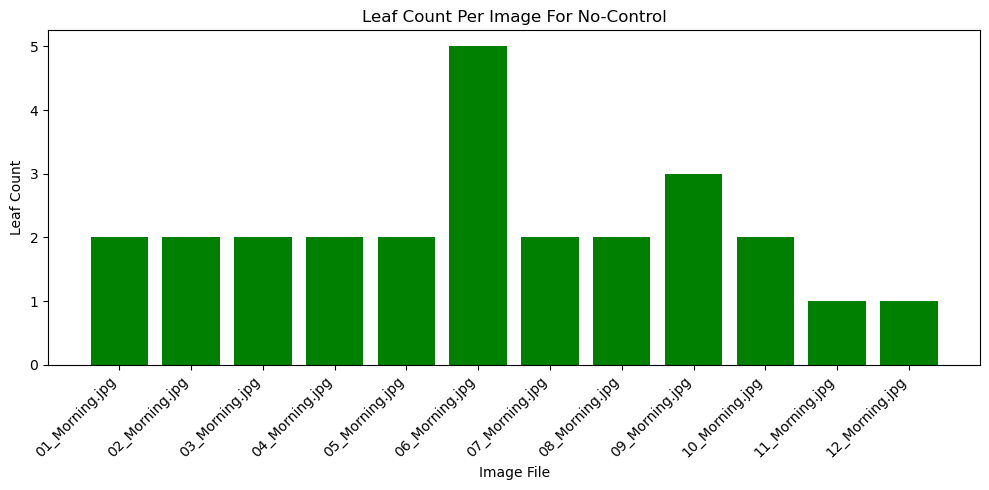

Processing complete. Results saved.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Set the folder path containing images (update this to your folder path)
folder_path = "PlantSelected/NoControls"
folder_path = "PlantSelected/WaterControls"

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

def count_leaves(image_path):
    """
    Count leaves in an image using HSV segmentation and contour analysis.
    """
    # Read the image
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Could not read image: {image_path}")
        return 0
    
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define range for green color in HSV - adjusted for your specific plant color
    lower_green = np.array([36, 60, 70])
    upper_green = np.array([80, 255, 255])
    
    # Create a mask for green color
    mask = cv2.inRange(hsv, lower_green, upper_green)
    
    # Morphological operations for noise removal
    small_kernel = np.ones((3, 3), np.uint8)
    large_kernel = np.ones((7, 7), np.uint8)
    
    # Remove small noise with opening
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, small_kernel, iterations=2)
    
    # Fill holes with closing
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, large_kernel, iterations=3)
    
    # Find contours
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours by area - increase this value significantly
    min_contour_area = 1490  # Increased value to filter out soil particles
    filtered_contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]
    
    # Draw contours on a copy of the original image
    result_img = image.copy()
    cv2.drawContours(result_img, filtered_contours, -1, (0, 255, 0), 2)
    
    # Add text showing the leaf count
    cv2.putText(result_img, f'Leaf count: {len(filtered_contours)}', 
                (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
    # Save the result image
    result_filename = "result_" + os.path.basename(image_path)
    cv2.imwrite(result_filename, result_img)
    
    return len(filtered_contours)

# Process each image and count leaves
leaf_counts = {}
for image_file in image_files:
    full_path = os.path.join(folder_path, image_file)
    leaf_counts[image_file] = count_leaves(full_path)
    print(f"{image_file}: {leaf_counts[image_file]} leaves detected")

# Plot the results - using the formatting from the provided code
plt.figure(figsize=(10, 5))
plt.bar(leaf_counts.keys(), leaf_counts.values(), color='green')
plt.xlabel("Image File")
plt.ylabel("Leaf Count")
plt.title("Leaf Count Per Image For No-Control")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the graph before showing it
plt.savefig('leaf_count_graph.png')
plt.show()

print("Processing complete. Results saved.")


01_Morning.jpg: 2 leaves detected
02_Morning.jpg: 3 leaves detected
03_Morning.jpg: 3 leaves detected
04_Morning.jpg: 4 leaves detected
05_Morning.jpg: 4 leaves detected
06_Morning.jpg: 4 leaves detected
07_Morning.jpg: 4 leaves detected
08_Morning.jpg: 5 leaves detected
09_Morning.jpg: 5 leaves detected
10_Morning.jpg: 5 leaves detected
11_Morning.jpg: 5 leaves detected
12_Morning.jpg: 5 leaves detected


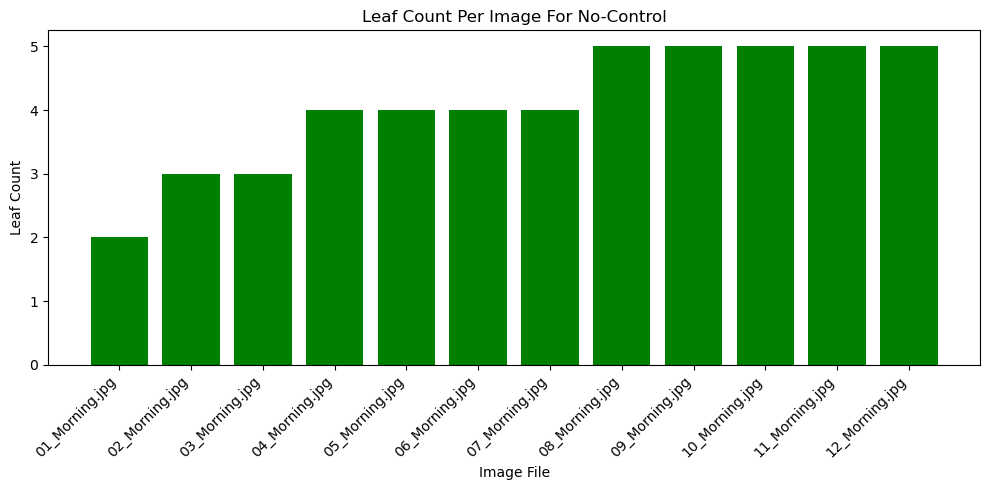

Processing complete. Results saved.


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Set the folder path containing images (update this to your folder path)
folder_path = "PlantSelected/NoControls"
#folder_path = "PlantSelected/WaterControls"

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

def count_leaves(image_path):
    """
    Count leaves in an image using HSV segmentation and contour analysis.
    """
    # Read the image
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Could not read image: {image_path}")
        return 0
    
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define range for green color in HSV - adjusted for your specific plant color
    lower_green = np.array([36, 60, 70])
    upper_green = np.array([80, 255, 255])
    
    # Create a mask for green color
    mask = cv2.inRange(hsv, lower_green, upper_green)
    
    # Morphological operations for noise removal
    small_kernel = np.ones((3, 3), np.uint8)
    large_kernel = np.ones((7, 7), np.uint8)
    
    # Remove small noise with opening
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, small_kernel, iterations=2)
    
    # Fill holes with closing
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, large_kernel, iterations=3)
    
    # Find contours
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours by area - increase this value significantly
    min_contour_area = 1490  # Increased value to filter out soil particles
    filtered_contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]
    
    # Draw contours on a copy of the original image
    result_img = image.copy()
    cv2.drawContours(result_img, filtered_contours, -1, (0, 255, 0), 2)
    
    # Add text showing the leaf count
    cv2.putText(result_img, f'Leaf count: {len(filtered_contours)}', 
                (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
    # Save the result image
    result_filename = "result_" + os.path.basename(image_path)
    cv2.imwrite(result_filename, result_img)
    
    return len(filtered_contours)

# Process each image and count leaves
leaf_counts = {}
for image_file in image_files:
    full_path = os.path.join(folder_path, image_file)
    leaf_counts[image_file] = count_leaves(full_path)
    print(f"{image_file}: {leaf_counts[image_file]} leaves detected")

# Plot the results - using the formatting from the provided code
plt.figure(figsize=(10, 5))
plt.bar(leaf_counts.keys(), leaf_counts.values(), color='green')
plt.xlabel("Image File")
plt.ylabel("Leaf Count")
plt.title("Leaf Count Per Image For No-Control")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the graph before showing it
plt.savefig('leaf_count_graph.png')
plt.show()

print("Processing complete. Results saved.")
